7.
==
En este ejercicio se propone verificar la predicción de ley de Zipf. 
Para ello, descargue desde Project Gutenberg el texto del Quijote de Cervantes 
    y escriba un programa que extraiga los términos y calcule sus frecuencias. 
Calcule la curva de ajuste utilizando la función Polyfit del módulo NymPy. 
Con los datos crudos y los estimados grafique en la notebook ambas distribuciones 
    (haga 2 gráficos, uno en escala lineal y otro en log-log). 
¿Cómo se comporta la predicción? 
¿Qué conclusiones puede obtener? 
    Verifique que el ajuste obtenido se comporta mejor para un rango de valores que excluye los primeros y
    los últimos dato



In [32]:
from os.path import isdir
from os import listdir
from modulos import tokenizer 
from modulos import dictionary
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

Extraigo los terminos del quijote
================================
Para eso defino la funcion get_terms()


In [15]:
def get_terms(file,file_empty_words= False):
    word_dic = {}
    lines = open(file,'r',errors = 'ignore').readlines()
    tokens = tokenizer.tokenizar(lines)
    if file_empty_words:
        stop_words = open(file_empty_words,'r').read()
        tokens = dictionary.sacar_palabras_vacias(tokens,stop_words)
        
    for token in tokens:
        if(token in word_dic):      
            word_dic[token] += 1
        else:
            word_dic[token] = 1
    return word_dic
     


Funcion Para ordenar el diccionario

In [3]:
def sort_dic(dic):
    
    return ((i,dic[i],idx+1) for idx,i in enumerate(sorted (dic,key=dic.get, reverse=True))  )
       

In [101]:
def graficar (list):
    x=[]
    y=[]
    x_log=[]
    y_log=[]
    #((x.append(value), y.apend(index)) for term,value,index in list)
    for term,value,index in list:
        x.append(index)
        y.append(value)
        
    ajuste = np.polyfit(np.log(x),np.log(y),1)
    recta =np.poly1d(ajuste)
    ypred = recta(np.log(x))
    
    ajuste_l =np.polyfit(x,y,1)
    recta_l = np.poly1d(ajuste_l)
    ypred_l = recta_l(x)

    r_cuad = r2_score(np.log(y),ypred)
    
   
    
    plt.plot(x,y,x,ypred_l)
    plt.title("Lineal") 
    plt.xlabel("Ranking") 
    plt.ylabel("Frecuencia") 
    plt.show()
    plt.plot(np.log(x),np.log(y),np.log(x),ypred)
    plt.title("Logaritmico") 
    plt.xlabel("Ranking") 
    plt.ylabel("Frecuencia")
    plt.show()
    
    
    

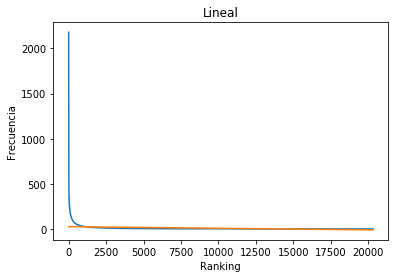

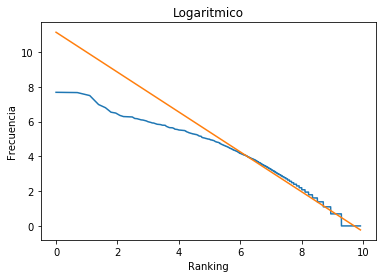

In [159]:
graficar(sort_dic(get_terms('gutemberg/pg2000.txt','extras/vacias.txt')))

En el grafico lineal se ve que en los primeros y ultimos terminos la recta naranja(recta predicta), no ajusta correctamente algo que el el grafico logaritmico se ve mas pronunciadamente. Se puede concluir que la mayor cantidad de terminos en los extremos inclina la recta de prediccion, y no logra un ajuste correcto. para esto se elminan los extremos


In [292]:
def graficar2 (lista,extrems=100):
    x=[]
    y=[]
    x_log=[]
    y_log=[]
    
    list_aux=(list(lista))
    
    long= len(list_aux)
    minimo = long*extrems//100
    maximo = long -minimo
    lista = list_aux[int(minimo):int(maximo)]
 
    for term,value,index in lista:
        x.append(index)
        y.append(value)
        
    ajuste = np.polyfit(np.log(x),np.log(y),1)
    recta =np.poly1d(ajuste)
    ypred = recta(np.log(x))
    
    ajuste_l =np.polyfit(x,y,1)
    recta_l = np.poly1d(ajuste_l)
    ypred_l = recta_l(x)

    r_cuad = r2_score(np.log(y),ypred)
    
   
    
    plt.plot(x,y,x,ypred_l)
    plt.title("Lineal") 
    plt.xlabel("Ranking") 
    plt.ylabel("Frecuencia") 
    plt.show()
    plt.plot(np.log(x),np.log(y),np.log(x),ypred)
    plt.title("Logaritmico") 
    plt.xlabel("Ranking") 
    plt.ylabel("Frecuencia")
    plt.show()

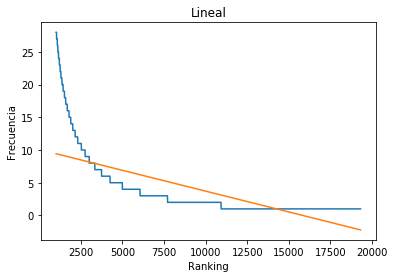

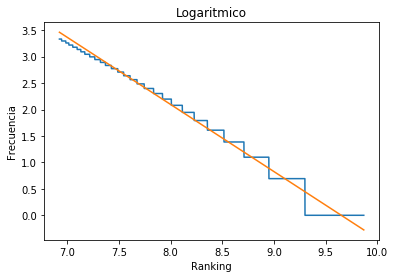

In [293]:
graficar2(sort_dic(get_terms('gutemberg/pg2000.txt','extras/vacias.txt')),5)

En este caso se puede ver que sin los extremos la curva ajusta mucho mejor, 

# Ejercicio 8 TP2 
Usando los datos del ejercicios anterior y de acuerdo a la ley de Zipf, calcule la proporción del total de términos para aquellos que tienen frecuencia f = {100, 1000, 10000}. Verifique respecto de los valores reales. ¿Qué conclusión puede obtener?

In [305]:
def ranking(lista):
    x=[]
    y=[]
    x_log=[]
    y_log=[]
    
   
    for term,value,index in lista:
        x.append(index)
        y.append(value)
        
    ajuste = np.polyfit(np.log(x),np.log(y),1)
    recta =np.poly1d(ajuste)
    ypred = recta(np.log(x))
    
    print(ajuste[0],ajuste[1])
    

In [306]:
ranking(list(sort_dic(get_terms('gutemberg/pg2000.txt','extras/vacias.txt'))))

-1.146549661565909 11.143378303877677
